#  <span style="color:blue">BINARY LOGISTIC CLASSIFIER USING LASSO</span> 
## <span style="color:red">Importing Libraries</span> 

In [ ]:
#import pandas/numpy for calculations + arrays
import pandas as pd
import numpy as np

#import matplotlib for plots
from matplotlib import pyplot as plt
%matplotlib inline

#import math for squaring or absolute error
import math

## <span style="color:red">Importing Data</span> 

In [2]:
#import dataset as df
df = pd.read_csv("training_matrix.csv")
df.head()

,File.Name,Disease.State,50.0173686103896,50.046905557377,50.0835007356322,50.1277943137255,50.1751682435897,50.2244724285714,50.2674862025317,50.3023772386364,...,999.3755015,999.421612333333,999.487145,999.610550666667,999.6786326,999.7367805,999.785652666667,999.840502,999.916009,999.9698235
0,1,0,0.000038,0.000038,0.000045,0.000031,0.000072,0.000047,0.000035,0.000039,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000056,0.000000,0.000042,0.000000,0.00000
1,2,0,0.000058,0.000051,0.000049,0.000060,0.000049,0.000053,0.000055,0.000052,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000057,0.00000
2,3,0,0.000089,0.000076,0.000078,0.000087,0.000073,0.000095,0.000075,0.000082,...,0.0,0.000082,0.000000,0.000000,0.000000,0.000000,0.000091,0.000000,0.000000,0.00008
3,4,0,0.000063,0.000052,0.000054,0.000053,0.000099,0.000054,0.000067,0.000056,...,0.0,0.000056,0.000000,0.000056,0.000066,0.000000,0.000000,0.000000,0.000000,0.00000
4,5,0,0.000051,0.000056,0.000047,0.000049,0.000060,0.000050,0.000050,0.000058,...,0.0,0.000000,0.000048,0.000000,0.000061,0.000000,0.000000,0.000000,0.000000,0.00000


## <span style="color:red">Splitting Data To X and Y Groups</span> 

In [4]:
#drop 
df.drop("File.Name", axis =1,inplace=True)

In [82]:
#split data
X = df.drop("Disease.State", axis =1)
y = df["Disease.State"]

## <span style="color:red">Train/Test LASSO Model Over Lambda Values (0.0001 -> 0.1) and Record MSE</span> 

In [7]:
#import train test split and split data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state = 3)

#Set up array for all recorded lambda values and MSE associated with chosen lambda
alphaPoints = [] #holds lambda
avgPoints = [] #holds MSE

#Import basic linear model
from sklearn import linear_model

#Set initial lambda close to 0: "0.0001"
alpha = 0.0001

#While loop iterates over 0.0001 lambda differences from 0.001 to 0.1, and records MSE from model prediction
while alpha < 0.1:
    
    #"alpha=alpha" lambda changes each iteration
    lasso_reg = linear_model.Lasso(alpha=alpha, fit_intercept=True, max_iter=100, tol = 0.1)
    lasso_reg.fit(xtrain, ytrain)
    
    #Get model predictions
    y_pred = lasso_reg.predict(xtest)
    #y_pred = [X.XXXX, X.XXXX, X.XXXX, X.XXXX]
    #ytest.values = [0 or 1, 0 or 1, 0 or 1, 0 or 1] 
    
    #Calculate MSE for this particular iteration of lambda with LASSO model
    total = 0;
    for i in range(4):
        #Square each difference: (y actual - y predicted)**2
        total+=pow(ytest.values[i]-y_pred[i],2)
    avgDiff = total/4
    
    #Append log(lamda) to the "alphaPoints" array
    alphaPoints.append(math.log(alpha))
    
    #Append MSE to the "avgPoints" array
    avgPoints.append(avgDiff)
    
    #Iterate lambda by increasing alpha by 0.0001
    alpha+=0.0001

## <span style="color:red">Graph Mean Squared Error by Log of Lambdas Chosen by Model</span> 

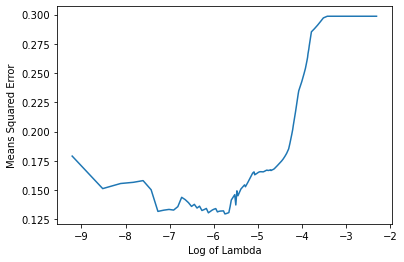

In [8]:
#convert arrays to numpy arrays
x=np.array(alphaPoints)
y=np.array(avgPoints)

#set up plot
plt.plot(x, y)

#label axi accordingly
plt.xlabel("Log of Lambda")
plt.ylabel("Means Squared Error")

#present plot
plt.show()

## <span style="color:red">Find Minima of "MSE x Log(Lambda) Graph" and Regraph With Optimal Values Identified</span> 

In [61]:
# function to find minimum and maximum position in list
def minimum(a, n):
 
    # inbuilt function to find the position of minimum
    minpos = a.index(min(a))
 
    # printing the position
    return (minpos + 1)

#Finding index of least MSE in "avgPoints" array
minIndex = minimum(avgPoints, len(avgPoints))

#See the least MSE and the corresponding Log(Lambda)
print(avgPoints[minIndex])
print(alphaPoints[minIndex])

0.12987484327709137
-5.713832810509703
1.932712206227801e-06


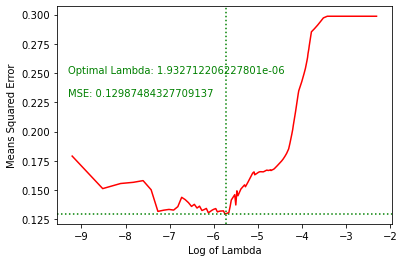

In [75]:
#Plot the MSExLog(Lambda) Graph again
x=np.array(alphaPoints)
y=np.array(avgPoints)

#Record min MSE and min lambda
minX = [alphaPoints[minIndex]]
minY = [avgPoints[minIndex]]

#Set up plot
plt.plot(x, y, color = "r")

#Set up two lines that intersect at the local minima: identifying the lowest MSE and the corresponding Log(lambda)
plt.axvline(minX, color = "g",linestyle=":")
plt.axhline(minY, color = "g",linestyle=":")

#Set up appropriate axi
plt.xlabel("Log of Lambda")
plt.ylabel("Means Squared Error")

#VERY IMPORTANT: Reverse Log(Lambda) back into just Lambda, so we can test the optimal "alpha" again
optimalLambda = 10**alphaPoints[minIndex]

#Record all final information in top left corner of graph
plt.text(-9.3, 0.25, 'Optimal Lambda: '+str(optimalLambda), size=10, color='green')
plt.text(-9.3, 0.23, 'MSE: '+str(avgPoints[minIndex]), size=10, color='green')

#Present the graph
plt.show()

## <span style="color:red">Use Optimal Lambda Identified to Test New LASSO Model For Fun</span> 

In [94]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state = 10)

lasso_reg = linear_model.Lasso(alpha=optimalLambda, fit_intercept=True, max_iter=100, tol = 0.1)
lasso_reg.fit(xtrain, ytrain)
    
y_pred = lasso_reg.predict(xtest)
print(y_pred)
print(ytest.values)

[0.14000112 0.00764031 0.89811941 0.65052896]
[0 0 1 0]


## <span style="color:red">Future Steps:</span> 
#### <span style="color:blue">- Improve "accuracy" measurement: currently only MSE</span> 
#### <span style="color:blue">- Finding new testing methods</span> 
#### <span style="color:blue">- Identify Key Analites from this data - could use the code below and sort? </span> 

In [ ]:
#If Needed (Back Up to Test) OR Can be used for Analite Importance:

colNames = list(df.columns)
if (any([lasso_reg.coef_[i]!=0 for i in range(len(lasso_reg.coef_))])):
    for i in range(len(lasso_reg.coef_)):
        if lasso_reg.coef_[i] !=0:
            print((colNames1[i],lasso_reg.coef_[i]))
else:
    print("All Zero Coeffs 😔")